# 🩺 Medical appointment - No Show
Entramos em acordo para utilizar o dataset "Medical appointment No show" que se refere aos agendamentos de consultas médicas, de pacientes que apareceram e não apareceram (variável target). Retiramos o dataset do [kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Importando dataset

In [2]:
# df = pd.read_csv('/content/drive/MyDrive/Let\'s Code/Turmas/[be-tech-by-brasken] Machine Learning II/7. MACHINE LEARNING II/Projeto orientado/KaggleV2-May-2016.csv')
# df = pd.read_csv('/content/drive/MyDrive/ADA_Braskem/Curso/7-[DS-PY-010] MACHINE LEARNING II/Projeto Orientado/KaggleV2-May-2016.csv')
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Inspecionando o Dataset

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# EDA - Exploratory Data Analysis

## Análise da Variável Target

In [6]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [7]:
df['No-show'].value_counts(normalize=True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

## Variáveis Explicativas

### Univariadas

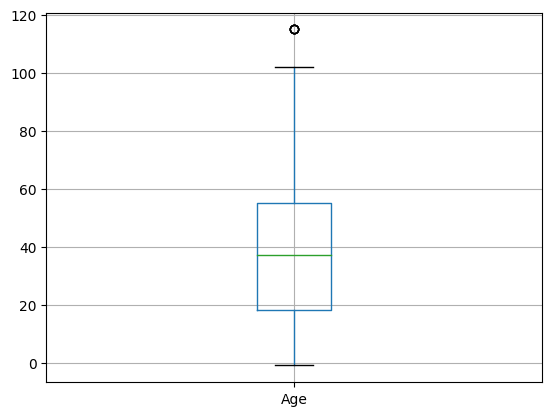

In [8]:
df.boxplot(column='Age')
plt.show()

In [9]:
print('Scholarship')
print(df['Scholarship'].value_counts(normalize=True))
print('----------')
print('Hipertension')
print(df['Hipertension'].value_counts(normalize=True))
print('----------')
print('Diabetes')
print(df['Diabetes'].value_counts(normalize=True))
print('----------')
print('Alcoholism')
print(df['Alcoholism'].value_counts(normalize=True))
print('----------')
print('Handcap')
print(df['Handcap'].value_counts(normalize=True))
print('----------')
print('SMS_received')
print(df['SMS_received'].value_counts(normalize=True))

Scholarship
Scholarship
0    0.901734
1    0.098266
Name: proportion, dtype: float64
----------
Hipertension
Hipertension
0    0.802754
1    0.197246
Name: proportion, dtype: float64
----------
Diabetes
Diabetes
0    0.928135
1    0.071865
Name: proportion, dtype: float64
----------
Alcoholism
Alcoholism
0    0.9696
1    0.0304
Name: proportion, dtype: float64
----------
Handcap
Handcap
0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: proportion, dtype: float64
----------
SMS_received
SMS_received
0    0.678974
1    0.321026
Name: proportion, dtype: float64


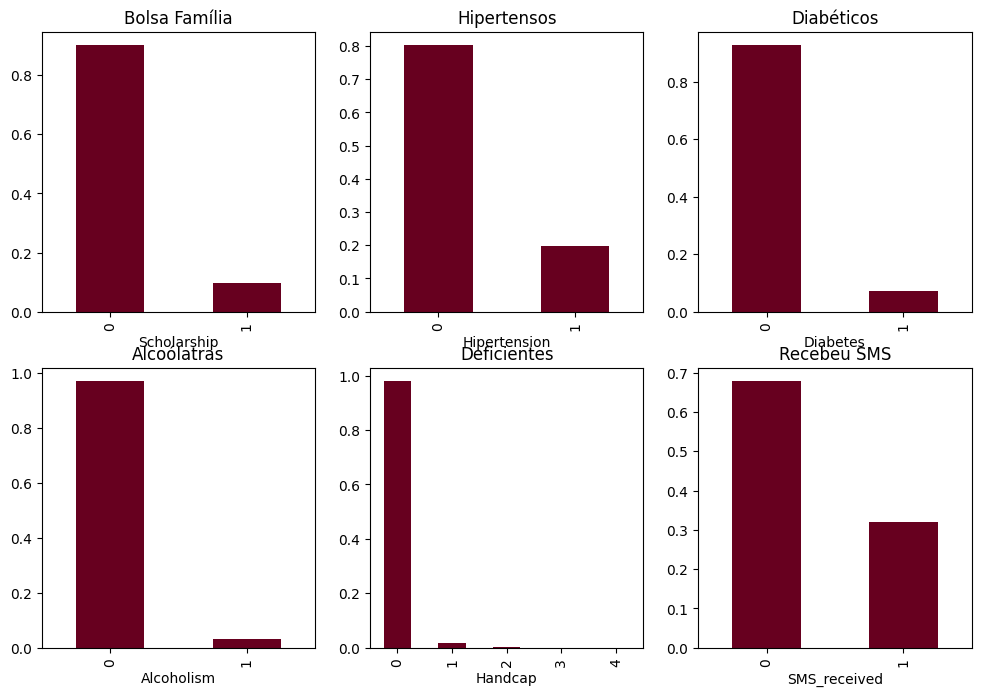

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

df['Scholarship'].value_counts(normalize=True).plot(kind='bar', ax=ax[0,0], title='Bolsa Família', colormap='RdGy')

df['Hipertension'].value_counts(normalize=True).plot(kind='bar', ax=ax[0,1], title='Hipertensos', colormap='RdGy')

df['Diabetes'].value_counts(normalize=True).plot(kind='bar', ax=ax[0,2], title='Diabéticos', colormap='RdGy')

df['Alcoholism'].value_counts(normalize=True).plot(kind='bar', ax=ax[1,0], title='Alcoólatras', colormap='RdGy')

df['Handcap'].value_counts(normalize=True).plot(kind='bar', ax=ax[1,1], title='Deficientes', colormap='RdGy')

df['SMS_received'].value_counts(normalize=True).plot(kind='bar', ax=ax[1,2], title='Recebeu SMS', colormap='RdGy')

plt.show()

Hipótese: Mulheres são mais consciêntes em relação a saúde do que os homens 🤔


In [11]:
df['Gender'].value_counts(normalize=True)

Gender
F    0.649977
M    0.350023
Name: proportion, dtype: float64

In [12]:
df['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

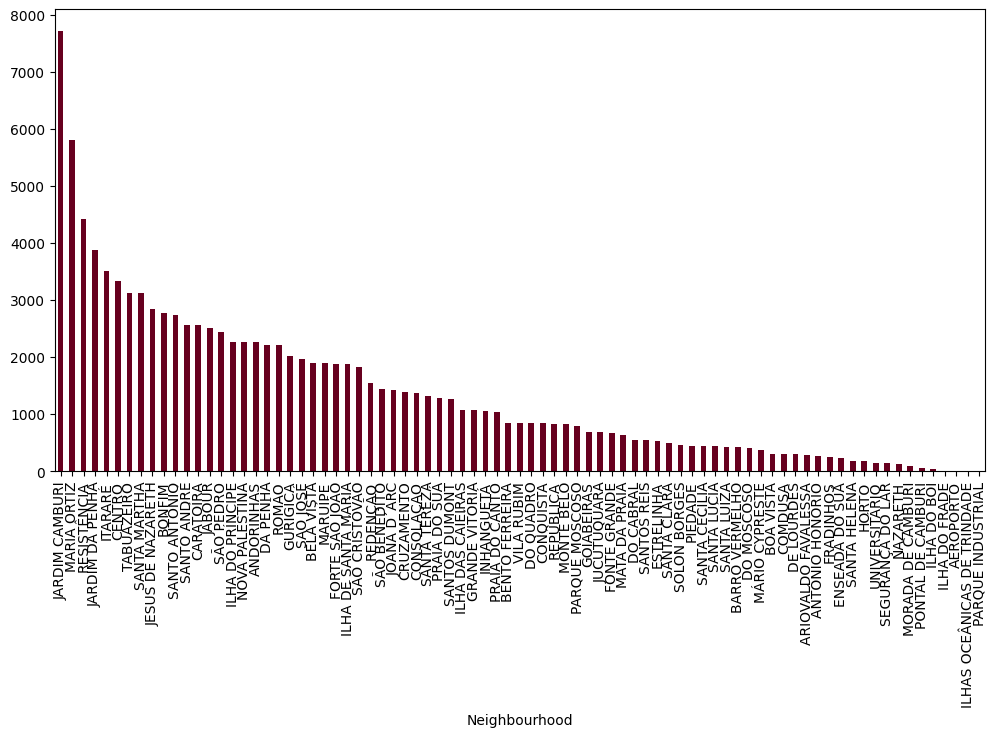

In [13]:
plt.figure(figsize=(12, 6))
df['Neighbourhood'].value_counts().plot(kind='bar', colormap='RdGy')
plt.show()

In [14]:
df['ScheduledDay'].value_counts()

ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: count, Length: 103549, dtype: int64

In [15]:
df['AppointmentDay'].value_counts()

AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: count, dtype: int64

### Bivariadas

In [16]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [17]:
df_exp = df[['Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]

In [18]:
df_exp.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<ipython-input-64-6066a9c29a97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['No-show'] = df_exp['No-show'].map({'No': 0, 'Yes': 1})


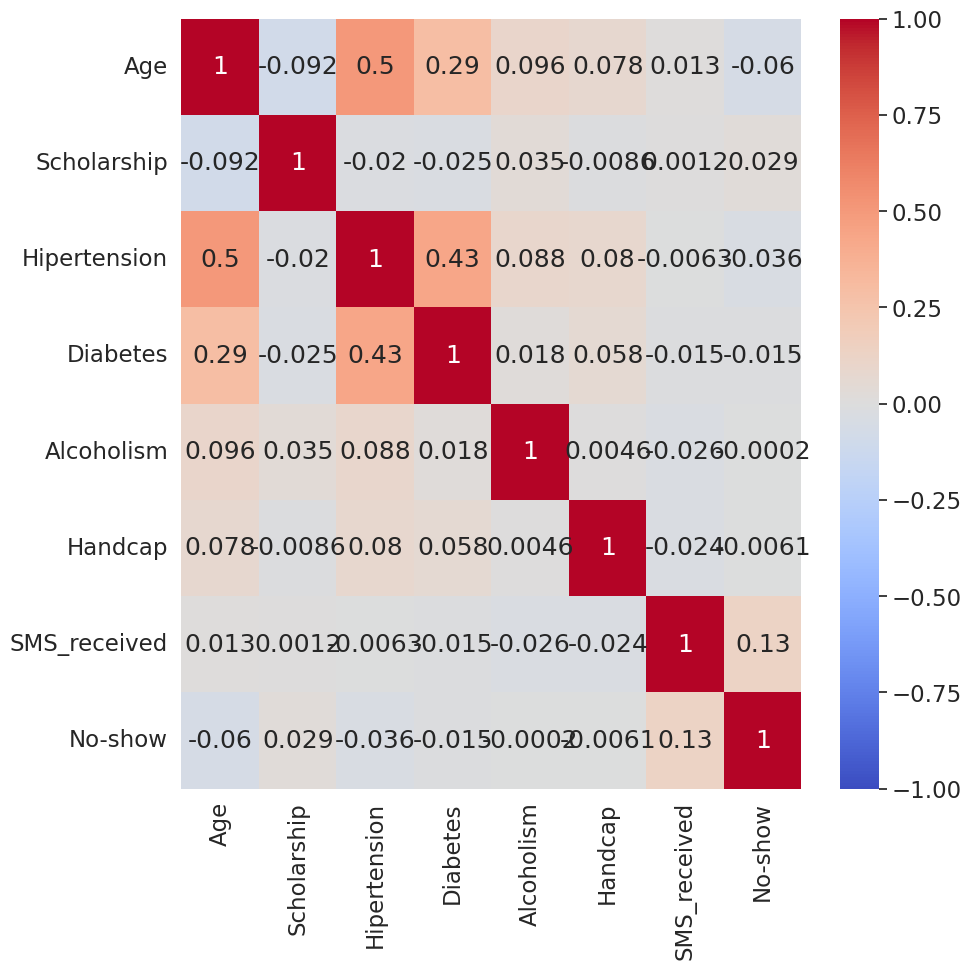

In [ ]:
# Convert 'No-show' to binary values (0 for 'No' and 1 for 'Yes')
df_exp['No-show'] = df_exp['No-show'].map({'No': 0, 'Yes': 1})

# List of columns for correlation calculation, including 'No-show'
columns_for_correlation = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

# Calculate the correlation matrix
correlation_matrix = df_exp[columns_for_correlation].corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
sns.set(font_scale=1.5)
plt.show()

# Limpeza do dataset

In [ ]:
# Retirar idade negativa
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
df = df[df['Age']>0]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Feature engineering

Ideias levantadas
* Criar variável de tempo entre marcação da consulta e a data da consulta
* Agrupamento dos bairros por região

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

Calculando o tempo entre a marcação da consulta e a data da consulta

In [ ]:
df[df['ScheduledDay'] > df['AppointmentDay']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [ ]:
df['AwaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

Ajustando a variável de bairro

In [ ]:
# map neighbourhood objects to integers
neighbourhood_map = {k: v for v, k in enumerate(pd.DataFrame(df['Neighbourhood'].value_counts()).reset_index(names='Neighbourhood_treat')['Neighbourhood_treat'])}
print(neighbourhood_map)
# create a new column for neighbourhood integers
df['NeighbourhoodNum'] = df['Neighbourhood'].map(neighbourhood_map)

{'JARDIM CAMBURI': 0, 'MARIA ORTIZ': 1, 'RESISTÊNCIA': 2, 'JARDIM DA PENHA': 3, 'ITARARÉ': 4, 'CENTRO': 5, 'SANTA MARTHA': 6, 'TABUAZEIRO': 7, 'JESUS DE NAZARETH': 8, 'BONFIM': 9, 'SANTO ANTÔNIO': 10, 'CARATOÍRA': 11, 'SANTO ANDRÉ': 12, 'JABOUR': 13, 'SÃO PEDRO': 14, 'ILHA DO PRÍNCIPE': 15, 'ANDORINHAS': 16, 'DA PENHA': 17, 'NOVA PALESTINA': 18, 'ROMÃO': 19, 'GURIGICA': 20, 'SÃO JOSÉ': 21, 'MARUÍPE': 22, 'BELA VISTA': 23, 'ILHA DE SANTA MARIA': 24, 'FORTE SÃO JOÃO': 25, 'SÃO CRISTÓVÃO': 26, 'REDENÇÃO': 27, 'JOANA D´ARC': 28, 'CRUZAMENTO': 29, 'SÃO BENEDITO': 30, 'CONSOLAÇÃO': 31, 'PRAIA DO SUÁ': 32, 'SANTA TEREZA': 33, 'SANTOS DUMONT': 34, 'GRANDE VITÓRIA': 35, 'PRAIA DO CANTO': 36, 'ILHA DAS CAIEIRAS': 37, 'INHANGUETÁ': 38, 'BENTO FERREIRA': 39, 'VILA RUBIM': 40, 'DO QUADRO': 41, 'REPÚBLICA': 42, 'CONQUISTA': 43, 'PARQUE MOSCOSO': 44, 'MONTE BELO': 45, 'GOIABEIRAS': 46, 'JUCUTUQUARA': 47, 'FONTE GRANDE': 48, 'MATA DA PRAIA': 49, 'DO CABRAL': 50, 'ESTRELINHA': 51, 'SANTOS REIS': 52, 'S

Ajustando o handcap

In [ ]:
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x > 1 else x)
df['Handcap'].value_counts()

0    104747
1      2240
Name: Handcap, dtype: int64

Ajustando a variável de gênero

In [ ]:
# Atribuímos como a seguinte lógica
## 0 - Feminino
## 1 - Masculino
df.loc[df['Gender'] == 'F', ['Gender']] = 0
df.loc[df['Gender'] == 'M', ['Gender']] = 1

# Ajuste na variável target

In [ ]:
df.rename(columns={'No-show': 'Show'}, inplace=True)
df.loc[df['Show'] == 'Yes', ['Show']] = 0
df.loc[df['Show'] == 'No', ['Show']] = 1

## DataFrame após tratamentos

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,AwaitingDays,NeighbourhoodNum
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,3
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,3
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,49
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,75
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,3


In [ ]:
df['Show'] = df['Show'].astype(int)

# Treinamento dos modelos

In [ ]:
X = df[['Gender', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'AwaitingDays', 'NeighbourhoodNum']]
y = df['Show']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Possibilidades de modelos
- Regressão Logística
- KNN
- Árvore de decisão
- Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

Regressão Logística

In [ ]:
lr_model = LogisticRegression() # instanciando o modelo
lr_model.fit(X_train, y_train) # fitando o modelo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03     17344
           1       0.80      0.99      0.88     68245

    accuracy                           0.79     85589
   macro avg       0.56      0.50      0.46     85589
weighted avg       0.70      0.79      0.71     85589



In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.01      0.03      4336
           1       0.80      0.99      0.89     17062

    accuracy                           0.80     21398
   macro avg       0.58      0.50      0.46     21398
weighted avg       0.71      0.80      0.71     21398



KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.20      0.26      4336
           1       0.82      0.92      0.86     17062

    accuracy                           0.77     21398
   macro avg       0.59      0.56      0.56     21398
weighted avg       0.73      0.77      0.74     21398



Árvore de decisão

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.34      0.33      4336
           1       0.83      0.81      0.82     17062

    accuracy                           0.72     21398
   macro avg       0.57      0.58      0.58     21398
weighted avg       0.73      0.72      0.72     21398



In [ ]:
importance = dt_model.feature_importances_

# Trabalhos futuros
- Usar geolocalização pra agrupar os bairros
- Otimizar hiperparâmetros